## Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

#### Data Description:
#### Murder -- Muder rates in different places of United States
#### Assualt- Assualt rate in different places of United States
#### UrbanPop - urban population in different places of United States
#### Rape - Rape rate in different places of United States


# KMeans

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
crime = pd.read_csv('crime_data.csv')

In [3]:
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [4]:
crime1 = crime.drop(['Unnamed: 0'], axis=1)
crime1

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


## Normalizing Function 


In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_crime = scaler.fit_transform(crime1.iloc[:, :])

In [6]:
scaled_crime

array([[0.74698795, 0.65410959, 0.44067797, 0.35917313],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 ],
       [0.48192771, 0.49657534, 0.30508475, 0.31524548],
       [0.4939759 , 0.79109589, 1.        , 0.86046512],
       [0.42771084, 0.54452055, 0.77966102, 0.81136951],
       [0.15060241, 0.22260274, 0.76271186, 0.09819121],
       [0.30722892, 0.6609589 , 0.6779661 , 0.21963824],
       [0.87951807, 0.99315068, 0.81355932, 0.63565891],
       [1.        , 0.56849315, 0.47457627, 0.47803618],
       [0.27108434, 0.00342466, 0.86440678, 0.33333333],
       [0.10843373, 0.25684932, 0.37288136, 0.17829457],
       [0.57831325, 0.69863014, 0.86440678, 0.43152455],
       [0.38554217, 0.23287671, 0.55932203, 0.35400517],
       [0.08433735, 0.03767123, 0.42372881, 0.10335917],
       [0.31325301, 0.23972603, 0.57627119, 0.27648579],
       [0.53614458, 0.21917808, 0.33898305, 0.23255814],
       [0.87951807, 0.69863014,

## Finding the optimum number of clusters

In [7]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(scaled_crime)

KMeans(n_clusters=3, random_state=0)

In [8]:
kmeans.inertia_

5.010878493006417

Text(0, 0.5, 'WCSS')

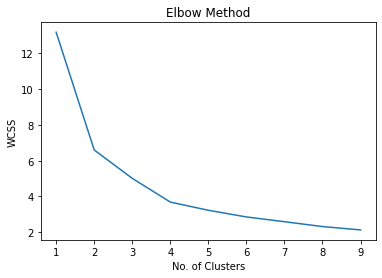

In [9]:
wcss = []
for i in range(1,10):
    kmeans = KMeans (n_clusters= i, random_state=0)
    kmeans.fit(scaled_crime)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,10), wcss)
plt.title('Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')

#### We can see that there isnt a major change from 4 to 5 and hence we take 4 as the number of clusters

In [10]:
from sklearn.cluster import KMeans
clusters_new = KMeans (4, random_state=2)
clusters_new.fit(scaled_crime)

KMeans(n_clusters=4, random_state=2)

In [11]:
clusters_new.labels_

array([2, 3, 3, 2, 3, 3, 0, 0, 3, 2, 0, 1, 3, 0, 1, 0, 1, 2, 1, 3, 0, 3,
       1, 2, 0, 1, 1, 3, 1, 0, 3, 3, 2, 1, 0, 0, 0, 0, 0, 2, 1, 2, 3, 0,
       1, 0, 0, 1, 1, 0], dtype=int32)

In [12]:
crime['clusterid_new']= clusters_new.labels_

In [13]:
clusters_new.cluster_centers_

array([[0.30439405, 0.32937147, 0.70588235, 0.31098951],
       [0.1686747 , 0.11485774, 0.34028683, 0.12601868],
       [0.79141566, 0.6802226 , 0.36864407, 0.36466408],
       [0.6124498 , 0.75      , 0.75423729, 0.67980189]])

In [14]:
crime.groupby('clusterid_new').agg(['mean'])

,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
clusterid_new,,,,
0,5.852941,141.176471,73.647059,19.335294
1,3.600000,78.538462,52.076923,12.176923
2,13.937500,243.625000,53.750000,21.412500
3,10.966667,264.000000,76.500000,33.608333


In [15]:
crime[crime['clusterid_new']==0];
crime[crime['clusterid_new']==1];
crime[crime['clusterid_new']==2];
crime[crime['clusterid_new']==3];

In [16]:
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusterid_new
0,Alabama,13.2,236,58,21.2,2
1,Alaska,10.0,263,48,44.5,3
2,Arizona,8.1,294,80,31.0,3
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,3
5,Colorado,7.9,204,78,38.7,3
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,3
9,Georgia,17.4,211,60,25.8,2


In [17]:
crime.groupby('clusterid_new').agg(['count'])

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
,count,count,count,count,count
clusterid_new,,,,,
0,17,17,17,17,17
1,13,13,13,13,13
2,8,8,8,8,8
3,12,12,12,12,12


### We can see the number of clusters created bases the dataset we have 
#### We can conclude that group 2 areas (Unnamed) has highest crime followed by 3, 0 and 1 respectively

### Hierarchical Clustering

In [18]:
crime = pd.read_csv('crime_data.csv')

In [19]:
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [20]:
crime_hr = crime.drop('Unnamed: 0', axis=1)

In [21]:
crime_hr

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
import scipy.cluster.hierarchy as sch

In [23]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return(x)

In [24]:
df_norm = norm_func(crime_hr.iloc[:, 0:])

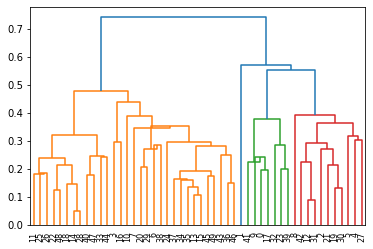

In [25]:
dendrogram = sch.dendrogram(sch.linkage(df_norm, method= 'centroid', ))

### Creating clusters using the data

In [26]:
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage='single')

In [27]:
y_hc = hc.fit_predict(df_norm)
Clusters = pd.DataFrame(y_hc, columns =['Clusters'])

In [28]:
Clusters

,Clusters
0,0
1,1
2,0
3,0
4,0
5,0
6,0
7,0
8,2
9,0


In [29]:
crime_hr['clusterid_new']= Clusters

In [30]:
crime_hr.sort_values('clusterid_new')

,Murder,Assault,UrbanPop,Rape,clusterid_new
0,13.2,236,58,21.2,0
27,12.2,252,81,46.0,0
28,2.1,57,56,9.5,0
29,7.4,159,89,18.8,0
30,11.4,285,70,32.1,0
31,11.1,254,86,26.1,0
32,13.0,337,45,16.1,0
33,0.8,45,44,7.3,0
34,7.3,120,75,21.4,0
35,6.6,151,68,20.0,0


In [31]:
crime_hr.groupby('clusterid_new').agg(['mean'])

,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
clusterid_new,,,,
0,7.583333,165.416667,65.604167,20.525
1,10.000000,263.000000,48.000000,44.500
2,15.400000,335.000000,80.000000,31.900


### We can see the cluster with label 2 has the highest crime rate followed by 1 and 0 respectively.

## DBSCAN Hierarchy

In [32]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
crime_db = pd.read_csv('crime_data.csv')

In [34]:
crime_db

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [35]:
crime2= crime_db.drop(['Unnamed: 0'], axis=1)
crime2

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_crime = scaler.fit_transform(crime2.iloc[:, :])

In [37]:
scaled_crime

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [38]:
dbscan = DBSCAN(eps =1.2, min_samples = 11)
dbscan.fit(scaled_crime)

DBSCAN(eps=1.2, min_samples=11)

In [39]:
dbscan.labels_

array([-1, -1, -1,  0, -1, -1,  0,  0, -1, -1,  0,  0, -1,  0,  0,  0,  0,
       -1, -1, -1,  0, -1,  0, -1,  0,  0,  0, -1,  0,  0, -1, -1, -1, -1,
        0,  0,  0,  0, -1, -1, -1, -1, -1,  0, -1,  0,  0, -1,  0,  0])

In [40]:
c1 = pd.DataFrame(dbscan.labels_, columns =['cluster'])

In [41]:
clustered = pd.concat([crime_db, c1], axis=1)

In [42]:
clustered

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,-1
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,-1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,-1
5,Colorado,7.9,204,78,38.7,-1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,-1
9,Georgia,17.4,211,60,25.8,-1


In [43]:
clustered.groupby('cluster').agg(['mean'])

,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
cluster,,,,
-1,10.092,217.76,63.84,24.472
0,5.484,123.76,67.24,17.992


 ### DBSCAN created two clusters with -1 label showing the noise points which states that the crime is scattered all across but the label 0 cluster has a confined group with significant crime rate

# Question 2
## Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 

## Hierarchy Clustering

In [44]:
airline = pd.read_csv('EastWestAirlines1.csv')
print(airline)

       ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_m

In [45]:
airline1 = airline.drop(columns=['ID#'])

In [46]:
airline1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [47]:
def norm_func(i):
    x= (i-i.min())/(i.max()-i.min())
    return (x)

In [48]:
df_norm1 = norm_func(airline1.iloc[:, 0:])

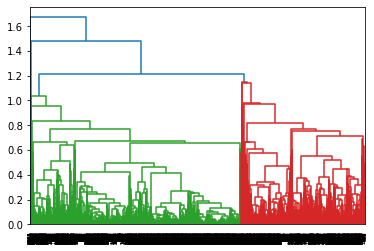

In [49]:
dendrogram = sch.dendrogram(sch.linkage(df_norm1, method='average'))

In [50]:
hc = AgglomerativeClustering (n_clusters=4, affinity = 'euclidean', linkage ='average')

In [51]:
y_hc= hc.fit_predict(df_norm1)
Clusters1=pd.DataFrame(y_hc, columns=['clusters'])

In [52]:
airline1['h_clusterid']=Clusters1

In [53]:
airline1.sort_values('h_clusterid')

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
1999,327126,1452,5,1,1,97997,25,350,3,4440,1,0
1513,124775,1704,1,1,1,11564,8,700,2,4847,1,0
1512,4779,0,1,1,1,600,2,0,0,4926,1,0
3162,103203,0,1,1,1,3200,4,200,2,1556,1,0
3165,194816,0,1,1,1,20822,25,6647,12,2424,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
275,1704838,0,1,1,1,17108,32,4823,23,7283,1,2
3594,27619,0,4,1,1,83726,68,14050,46,1325,1,3
3235,287033,0,1,1,1,26161,58,12873,53,2272,1,3
2015,53232,888,4,1,1,80696,65,22100,45,3831,1,3


In [54]:
airline1.groupby('h_clusterid').agg(['mean'])

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
h_clusterid,,,,,,,,,,,
0,9.586906e+04,240.069783,2.663279,1.015583,1.018293,28813.871274,15.626694,803.046070,2.459350,4629.832656,1.0
1,5.980784e+04,87.602462,1.705322,1.013900,1.008737,10227.689039,9.142971,226.292295,0.652502,3820.652105,0.0
2,1.704838e+06,0.000000,1.000000,1.000000,1.000000,17108.000000,32.000000,4823.000000,23.000000,7283.000000,1.0
3,1.319995e+05,347.000000,2.500000,1.000000,1.000000,65634.250000,69.250000,19960.000000,49.250000,2200.250000,1.0


In [55]:
airline1[airline1['h_clusterid']==0]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0
7,20856,0,1,1,1,5250,4,250,1,6938,1,0
8,443003,0,3,2,1,1753,43,3850,12,6948,1,0
9,104860,0,3,1,1,28426,28,1150,3,6931,1,0
11,96522,0,5,1,1,61105,19,0,0,6924,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3987,11933,0,1,1,1,249,3,79,1,1412,1,0
3989,2622,0,1,1,1,1625,6,0,0,1404,1,0
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0


In [56]:
airline1[airline1['h_clusterid']==1]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
5,16420,0,1,1,1,0,0,0,0,6942,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3991,39142,0,3,1,1,14981,28,0,0,1408,0,1
3992,11181,0,1,1,1,929,12,0,0,1407,0,1
3993,3974,0,1,1,1,365,3,0,0,1397,0,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,1


In [57]:
airline1[airline1['h_clusterid']==2]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
275,1704838,0,1,1,1,17108,32,4823,23,7283,1,2


In [58]:
airline1[airline1['h_clusterid']==3]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
2015,53232,888,4,1,1,80696,65,22100,45,3831,1,3
3235,287033,0,1,1,1,26161,58,12873,53,2272,1,3
3583,160114,500,1,1,1,71954,86,30817,53,1373,1,3
3594,27619,0,4,1,1,83726,68,14050,46,1325,1,3


### from the above clusters we can say that cluster with label 1 comprises of largest number of customers who have enrolled in frequent travel but havent utilized it much
### label 2 cluster has only one customer who has an award with quite an average number of different parameters
### Cluster with label 3 are the ones who benefitted the most from the program while label 0 cluster can be seen with having average customers

# KMeans

In [59]:
airline = pd.read_csv('EastWestAirlines1.csv');
airline2 = airline.drop(columns=['ID#'])

In [60]:
airline2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [61]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler_airline2 = scaler.fit_transform(airline2.iloc[:,0:])

In [62]:
scaler_airline2

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [63]:
kmeans =KMeans(n_clusters= 10, random_state=3)
kmeans.fit(scaler_airline2)

KMeans(n_clusters=10, random_state=3)

In [64]:
kmeans.inertia_

14727.130129382489

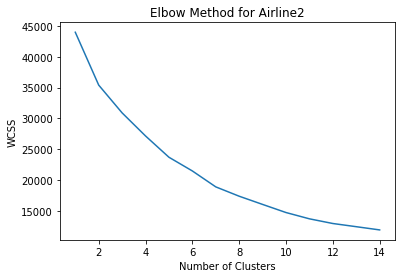

In [65]:
wcss = []
for i in range(1,15):
    kmeans = KMeans(n_clusters=i, random_state=3)
    kmeans.fit(scaler_airline2)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,15), wcss)
plt.title('Elbow Method for Airline2')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [66]:
from sklearn.cluster import KMeans
clusters_new = KMeans(7, random_state=3)
clusters_new.fit(scaler_airline2)

KMeans(n_clusters=7, random_state=3)

In [67]:
clusters_new.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int32)

In [68]:
airline2['clustersid_new']=clusters_new.labels_

In [69]:
clusters_new.cluster_centers_

array([[-3.00727004e-01, -1.42585938e-01, -5.45896488e-01,
        -9.82418871e-02, -6.02823308e-02, -5.13292282e-01,
        -4.63174232e-01, -2.16901323e-01, -2.38263438e-01,
        -2.36650004e-01, -7.66919299e-01],
       [-1.57685427e-01, -6.18328272e-02, -2.71174007e-01,
        -9.82418871e-02, -6.27665798e-02, -2.73924433e-01,
        -1.08849367e-01, -2.83463818e-02, -2.23262788e-02,
         5.41191988e-02,  1.30391816e+00],
       [ 1.20808808e+00,  4.89148889e-01,  2.12446505e-01,
        -9.82418871e-02, -6.27665798e-02,  7.72707386e-01,
         1.85763042e+00,  4.01589095e+00,  4.26567212e+00,
         2.88928012e-01,  9.06317367e-01],
       [ 6.39719256e-01, -8.44329231e-02,  1.02208440e+00,
        -9.82418871e-02,  1.56462993e+01,  3.17969131e+00,
         1.71461374e+00,  3.32926913e-02,  5.96953922e-02,
         2.39872612e-01,  3.37527346e-01],
       [-4.68896637e-02, -1.56235600e-01, -6.68227273e-01,
         9.03825361e+00, -6.27665798e-02, -1.01665326e-01,
  

In [70]:
airline2.groupby('clustersid_new').agg(['mean'])

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
clustersid_new,,,,,,,,,,,
0,43358.215221,33.798352,1.308774,1.000000,1.000485,4759.297625,7.157538,156.310713,0.469704,3629.882695,0.000000
1,57722.094527,97.406716,1.687811,1.000000,1.000000,10552.304726,10.573383,421.215174,1.291045,4229.253731,1.000000
2,195331.984000,522.504000,2.352000,1.000000,1.000000,35804.144000,29.440000,6082.440000,17.552000,4715.160000,0.808000
3,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
4,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349
5,137158.895973,56.799776,4.105145,1.000000,1.002237,47711.880313,19.668904,372.161074,1.134228,5072.482103,0.583893
6,116472.400000,5636.345455,2.072727,1.000000,1.000000,19804.290909,12.545455,963.036364,2.890909,3950.636364,0.527273


In [71]:
airline2[airline2['clustersid_new']==0].shape

(2063, 12)

In [72]:
airline2[airline2['clustersid_new']==1].shape


(804, 12)

In [73]:
airline2[airline2['clustersid_new']==2].shape

(125, 12)

In [74]:
airline2[airline2['clustersid_new']==3].shape


(15, 12)

In [75]:
airline2[airline2['clustersid_new']==4].shape

(43, 12)

In [76]:

airline2[airline2['clustersid_new']==5].shape

(894, 12)

In [77]:

airline2[airline2['clustersid_new']==6].shape

(55, 12)

### KMeans clustering derived 7 clusters in which different customers are grouped
### cluster with label 2 has around 125 customers who has to earn highest to get an award travel
### label 4 customers have least average award ration

# DBSCAN

In [78]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [79]:
airline = pd.read_csv('EastWestAirlines1.csv');
airline3 = airline.drop(columns=['ID#'])

In [80]:
airline3

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [81]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_airline3 = scaler.fit_transform(airline3.iloc[:, :])

In [82]:
scaled_airline3

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [83]:
(scaled_airline3.max()+scaled_airline3.min())/2

9.844696486110527

In [84]:
scaled_airline3.min()

-1.9936106363995172

In [85]:
dbscan = DBSCAN(eps =0.2, min_samples = 44)
dbscan.fit(scaled_airline3)

DBSCAN(eps=0.2, min_samples=44)

In [86]:
dbscan.labels_

array([-1, -1, -1, ..., -1, -1,  2])

In [87]:
c2 = pd.DataFrame(dbscan.labels_, columns=['cluster'])

In [88]:
clustered = pd.concat([airline3, c2], axis=1)

In [89]:
clustered

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,-1
1,19244,0,1,1,1,215,2,0,0,6968,0,-1
2,41354,0,1,1,1,4123,4,0,0,7034,0,-1
3,14776,0,1,1,1,500,1,0,0,6952,0,-1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,-1
3995,64385,0,1,1,1,981,5,0,0,1395,1,-1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,-1
3997,54899,0,1,1,1,500,1,500,1,1401,0,-1


In [90]:
clustered.groupby('cluster').agg(['mean'])

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
cluster,,,,,,,,,,,
-1,78659.115385,156.09805,2.147616,1.01571,1.013272,18558.109967,12.546316,498.310672,1.487811,4285.199350,0.401138
0,12868.478261,0.00000,1.000000,1.00000,1.000000,20.108696,0.086957,0.000000,0.000000,4899.173913,0.000000
1,13020.000000,0.00000,1.000000,1.00000,1.000000,104.478261,0.217391,0.000000,0.000000,3332.108696,0.000000
2,16283.470149,0.00000,1.000000,1.00000,1.000000,134.828358,0.291045,0.000000,0.000000,1799.410448,0.000000
3,6782.716049,0.00000,1.000000,1.00000,1.000000,270.370370,0.271605,0.000000,0.000000,363.000000,0.000000


### The DBSCAN method shows 4 clusters being created; however majority of the customers are in the 'Noise Points' zone providing no significance to the overall report for airmiles and awards.